# Face Generation
In this project, you'll use generative adversarial networks to generate new images of faces.
### Get the Data
You'll be using two datasets in this project:
- MNIST
- CelebA

Since the celebA dataset is complex and you're doing GANs in a project for the first time, we want you to test your neural network on MNIST before CelebA.  Running the GANs on MNIST will allow you to see how well your model trains sooner.

If you're using [FloydHub](https://www.floydhub.com/), set `data_dir` to "/input" and use the [FloydHub data ID](http://docs.floydhub.com/home/using_datasets/) "R5KrjnANiKVhLWAkpXhNBe".

In [1]:
#data_dir = './data'

# FloydHub - Use with data ID "R5KrjnANiKVhLWAkpXhNBe"
data_dir = '/input'


"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import helper

helper.download_extract('mnist', data_dir)
helper.download_extract('celeba', data_dir)

Found mnist Data
Found celeba Data


## Explore the Data
### MNIST
As you're aware, the [MNIST](http://yann.lecun.com/exdb/mnist/) dataset contains images of handwritten digits. You can view the first number of examples by changing `show_n_images`. 

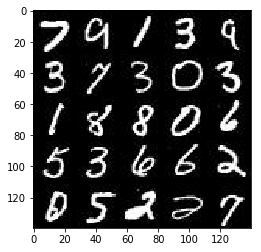

In [2]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
%matplotlib inline
import os
from glob import glob
from matplotlib import pyplot

mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'mnist/*.jpg'))[:show_n_images], 28, 28, 'L')
pyplot.imshow(helper.images_square_grid(mnist_images, 'L'), cmap='gray')

### CelebA
The [CelebFaces Attributes Dataset (CelebA)](http://mmlab.ie.cuhk.edu.hk/projects/CelebA.html) dataset contains over 200,000 celebrity images with annotations.  Since you're going to be generating faces, you won't need the annotations.  You can view the first number of examples by changing `show_n_images`.

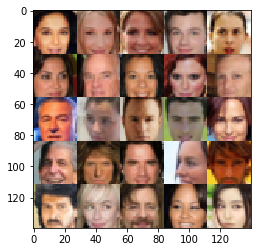

In [3]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'img_align_celeba/*.jpg'))[:show_n_images], 28, 28, 'RGB')
pyplot.imshow(helper.images_square_grid(mnist_images, 'RGB'))

## Preprocess the Data
Since the project's main focus is on building the GANs, we'll preprocess the data for you.  The values of the MNIST and CelebA dataset will be in the range of -0.5 to 0.5 of 28x28 dimensional images.  The CelebA images will be cropped to remove parts of the image that don't include a face, then resized down to 28x28.

The MNIST images are black and white images with a single [color channel](https://en.wikipedia.org/wiki/Channel_(digital_image%29) while the CelebA images have [3 color channels (RGB color channel)](https://en.wikipedia.org/wiki/Channel_(digital_image%29#RGB_Images).
## Build the Neural Network
You'll build the components necessary to build a GANs by implementing the following functions below:
- `model_inputs`
- `discriminator`
- `generator`
- `model_loss`
- `model_opt`
- `train`

### Check the Version of TensorFlow and Access to GPU
This will check to make sure you have the correct version of TensorFlow and access to a GPU

In [4]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
from distutils.version import LooseVersion
import warnings
import tensorflow as tf

# Check TensorFlow Version
assert LooseVersion(tf.__version__) >= LooseVersion('1.0'), 'Please use TensorFlow version 1.0 or newer.  You are using {}'.format(tf.__version__)
print('TensorFlow Version: {}'.format(tf.__version__))

# Check for a GPU
if not tf.test.gpu_device_name():
    warnings.warn('No GPU found. Please use a GPU to train your neural network.')
else:
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))

TensorFlow Version: 1.1.0
Default GPU Device: /gpu:0


### Input
Implement the `model_inputs` function to create TF Placeholders for the Neural Network. It should create the following placeholders:
- Real input images placeholder with rank 4 using `image_width`, `image_height`, and `image_channels`.
- Z input placeholder with rank 2 using `z_dim`.
- Learning rate placeholder with rank 0.

Return the placeholders in the following the tuple (tensor of real input images, tensor of z data)

In [5]:
import problem_unittests as tests

def model_inputs(image_width, image_height, image_channels, z_dim):
    """
    Create the model inputs
    :param image_width: The input image width
    :param image_height: The input image height
    :param image_channels: The number of image channels
    :param z_dim: The dimension of Z
    :return: Tuple of (tensor of real input images, tensor of z data, learning rate)
    """
    # TODO: Implement Function
#     images = tf.placeholder(tf.float32, (None, image_width, image_height, image_channels), "images")
#     z = tf.placeholder(tf.float32, (None, z_dim), "z")
#     learning_rate = tf.placeholder(tf.float32, name="learning_rate")
#     return images, z, learning_rate

    inputs_real = tf.placeholder(tf.float32, (None, image_width, image_height, image_channels), "inputs_real")
    inputs_z = tf.placeholder(tf.float32, (None, z_dim), name="inputs_z")
    learning_rate = tf.placeholder(tf.float32, name="learning_rate")

    return inputs_real, inputs_z, learning_rate



"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_inputs(model_inputs)

Tests Passed


### Discriminator
Implement `discriminator` to create a discriminator neural network that discriminates on `images`.  This function should be able to reuse the variables in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "discriminator" to allow the variables to be reused.  The function should return a tuple of (tensor output of the discriminator, tensor logits of the discriminator).

In [6]:
def discriminator(images, reuse=False):
    """
    Create the discriminator network
    :param images: Tensor of input image(s)
    :param reuse: Boolean if the weights should be reused
    :return: Tuple of (tensor output of the discriminator, tensor logits of the discriminator)
    """
    # TODO: Implement Function
    alpha = 0.2
    training = True
    x = images
    with tf.variable_scope('discriminator', reuse=reuse):

        x = tf.layers.conv2d(x, 64, 4, strides=2, padding="same")
        x = tf.maximum(alpha * x, x)
        
        x = tf.layers.conv2d(x, 128, 4, strides=1, padding="same")
        x = tf.layers.batch_normalization(x, training=training)
        x = tf.maximum(alpha * x, x)
        
        x = tf.layers.conv2d(x, 256, 4, strides=2, padding="same")
        x = tf.layers.batch_normalization(x, training=training)
        x = tf.maximum(alpha * x, x)
        
        x = tf.reshape(x, (-1, 7*7*256))
        logits = tf.layers.dense(x, 1)
        out = tf.sigmoid(logits)
        
        return out, logits


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_discriminator(discriminator, tf)

Tests Passed


### Generator
Implement `generator` to generate an image using `z`. This function should be able to reuse the variables in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "generator" to allow the variables to be reused. The function should return the generated 28 x 28 x `out_channel_dim` images.

In [7]:
def generator(z, out_channel_dim, is_train=True):
    """
    Create the generator network
    :param z: Input z
    :param out_channel_dim: The number of channels in the output image
    :param is_train: Boolean if generator is being used for training
    :return: The tensor output of the generator
    """
    # TODO: Implement Function
    alpha = 0.2
    with tf.variable_scope("generator", reuse=not is_train):
        x = tf.layers.dense(z, 7*7*256)
        x = tf.reshape(x, (-1, 7,7,256))
        x = tf.layers.batch_normalization(x, training=is_train)
        x = tf.maximum(x*alpha, x)
        
#         x = tf.layers.conv2d_transpose(x, 256, 4, strides=2, padding="same")
#         x = tf.layers.batch_normalization(x, training=is_train)
#         x = tf.maximum(x*alpha, x)
        
        x = tf.layers.conv2d_transpose(x, 128, 4, strides=1, padding="same")
        x = tf.layers.batch_normalization(x, training=is_train)
        x = tf.maximum(x*alpha, x)
        #14*14
        
        x = tf.layers.conv2d_transpose(x, 64, 4, strides=2, padding="same")
        x = tf.layers.batch_normalization(x, training=is_train)
        x = tf.maximum(x*alpha, x)
        #28*28
        
        #x = tf.layers.conv2d_transpose(x, 3, kernel_size = [5, 5], strides=1, padding="valid")
        logits = tf.layers.conv2d_transpose(x, out_channel_dim, 4, strides=2, padding="same")
        
        out = tf.tanh(logits)
        
        return out


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_generator(generator, tf)

Tests Passed


### Loss
Implement `model_loss` to build the GANs for training and calculate the loss.  The function should return a tuple of (discriminator loss, generator loss).  Use the following functions you implemented:
- `discriminator(images, reuse=False)`
- `generator(z, out_channel_dim, is_train=True)`

In [8]:
def model_loss(input_real, input_z, out_channel_dim):
    """
    Get the loss for the discriminator and generator
    :param input_real: Images from the real dataset
    :param input_z: Z input
    :param out_channel_dim: The number of channels in the output image
    :return: A tuple of (discriminator loss, generator loss)
    """
    # TODO: Implement Function
    g_model = generator(input_z, out_channel_dim, is_train=True)
    d_model_real, d_logits_real = discriminator(input_real, reuse=False)
    d_model_fake, d_logits_fake = discriminator(g_model, reuse=True)

    g_loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_fake, labels=tf.ones_like(d_model_fake)))
    d_loss_real = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_real, labels=tf.ones_like(d_model_real)))
    d_loss_fake = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_fake, labels=tf.zeros_like(d_model_fake)))
    d_loss = d_loss_real + d_loss_fake
    
    return d_loss, g_loss


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_loss(model_loss)

Tests Passed


### Optimization
Implement `model_opt` to create the optimization operations for the GANs. Use [`tf.trainable_variables`](https://www.tensorflow.org/api_docs/python/tf/trainable_variables) to get all the trainable variables.  Filter the variables with names that are in the discriminator and generator scope names.  The function should return a tuple of (discriminator training operation, generator training operation).

In [9]:
def model_opt(d_loss, g_loss, learning_rate, beta1):
    """
    Get optimization operations
    :param d_loss: Discriminator loss Tensor
    :param g_loss: Generator loss Tensor
    :param learning_rate: Learning Rate Placeholder
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :return: A tuple of (discriminator training operation, generator training operation)
    """
    # TODO: Implement Function
    t_vars = tf.trainable_variables()
    g_vars = [var for var in t_vars if var.name.startswith('generator')]
    d_vars = [var for var in t_vars if var.name.startswith('discriminator')]

    
    with tf.control_dependencies(tf.get_collection(tf.GraphKeys.UPDATE_OPS)):
        d_train_opt = tf.train.AdamOptimizer(learning_rate, beta1=beta1).minimize(d_loss, var_list=d_vars)
        g_train_opt = tf.train.AdamOptimizer(learning_rate, beta1=beta1).minimize(g_loss, var_list=g_vars)

    return d_train_opt, g_train_opt


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_opt(model_opt, tf)

Tests Passed


## Neural Network Training
### Show Output
Use this function to show the current output of the generator during training. It will help you determine how well the GANs is training.

In [10]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import numpy as np

def show_generator_output(sess, n_images, input_z, out_channel_dim, image_mode):
    """
    Show example output for the generator
    :param sess: TensorFlow session
    :param n_images: Number of Images to display
    :param input_z: Input Z Tensor
    :param out_channel_dim: The number of channels in the output image
    :param image_mode: The mode to use for images ("RGB" or "L")
    """
    cmap = None if image_mode == 'RGB' else 'gray'
    z_dim = input_z.get_shape().as_list()[-1]
    example_z = np.random.uniform(-1, 1, size=[n_images, z_dim])

    samples = sess.run(
        generator(input_z, out_channel_dim, False),
        feed_dict={input_z: example_z})

    images_grid = helper.images_square_grid(samples, image_mode)
    pyplot.imshow(images_grid, cmap=cmap)
    pyplot.show()

### Train
Implement `train` to build and train the GANs.  Use the following functions you implemented:
- `model_inputs(image_width, image_height, image_channels, z_dim)`
- `model_loss(input_real, input_z, out_channel_dim)`
- `model_opt(d_loss, g_loss, learning_rate, beta1)`

Use the `show_generator_output` to show `generator` output while you train. Running `show_generator_output` for every batch will drastically increase training time and increase the size of the notebook.  It's recommended to print the `generator` output every 100 batches.

In [11]:
def train(epoch_count, batch_size, z_dim, learning_rate, beta1, get_batches, data_shape, data_image_mode):
    """
    Train the GAN
    :param epoch_count: Number of epochs
    :param batch_size: Batch Size
    :param z_dim: Z dimension
    :param learning_rate: Learning Rate
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :param get_batches: Function to get batches
    :param data_shape: Shape of the data
    :param data_image_mode: The image mode to use for images ("RGB" or "L")
    """
    # TODO: Build Model
    n_samples, image_width, image_height, image_channels = data_shape
    inputs_real, inputs_z, learn_rate = model_inputs(image_width, image_height, image_channels, z_dim)
    d_loss, g_loss = model_loss(inputs_real, inputs_z, image_channels)
    d_opt, g_opt = model_opt(d_loss, g_loss, learning_rate, beta1)
    
    steps = 0
    show_every = 100
    print_every = 10
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        for epoch_i in range(epoch_count):
            for batch_images in get_batches(batch_size):
                # TODO: Train Model
                batch_images = 2 * batch_images
                steps += 1

                # Sample random noise for G
                batch_z = np.random.uniform(-1, 1, size=(batch_size, z_dim))

                # Run optimizers
                _ = sess.run(d_opt, feed_dict={inputs_real: batch_images, inputs_z: batch_z})
                _ = sess.run(g_opt, feed_dict={inputs_real: batch_images, inputs_z: batch_z})

                if steps % print_every == 0:
                    # At the end of each epoch, get the losses and print them out
                    train_loss_d = d_loss.eval({inputs_z: batch_z, inputs_real: batch_images})
                    train_loss_g = g_loss.eval({inputs_z: batch_z})

                    print("Epoch {}/{}...".format(epoch_i+1, epochs),
                          "Discriminator Loss: {:.4f}...".format(train_loss_d),
                          "Generator Loss: {:.4f}".format(train_loss_g))

                if steps % show_every == 0:
                    show_generator_output(sess, show_n_images, inputs_z, image_channels, data_image_mode)

### MNIST
Test your GANs architecture on MNIST.  After 2 epochs, the GANs should be able to generate images that look like handwritten digits.  Make sure the loss of the generator is lower than the loss of the discriminator or close to 0.

Epoch 1/2... Discriminator Loss: 0.3918... Generator Loss: 1.5226
Epoch 1/2... Discriminator Loss: 0.2419... Generator Loss: 1.8714
Epoch 1/2... Discriminator Loss: 0.3984... Generator Loss: 1.7155
Epoch 1/2... Discriminator Loss: 0.2780... Generator Loss: 2.4714
Epoch 1/2... Discriminator Loss: 0.3162... Generator Loss: 1.8158
Epoch 1/2... Discriminator Loss: 1.2333... Generator Loss: 0.4719
Epoch 1/2... Discriminator Loss: 0.8908... Generator Loss: 0.8933
Epoch 1/2... Discriminator Loss: 0.4508... Generator Loss: 3.1939
Epoch 1/2... Discriminator Loss: 0.5521... Generator Loss: 1.2153
Epoch 1/2... Discriminator Loss: 0.3919... Generator Loss: 1.8453


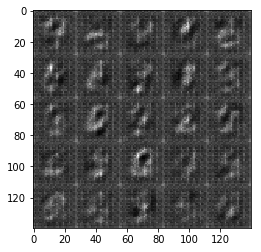

Epoch 1/2... Discriminator Loss: 0.4655... Generator Loss: 1.5753
Epoch 1/2... Discriminator Loss: 0.4498... Generator Loss: 1.8688
Epoch 1/2... Discriminator Loss: 0.6620... Generator Loss: 2.9096
Epoch 1/2... Discriminator Loss: 0.4188... Generator Loss: 1.7662
Epoch 1/2... Discriminator Loss: 0.5982... Generator Loss: 1.1737
Epoch 1/2... Discriminator Loss: 0.4453... Generator Loss: 1.9220
Epoch 1/2... Discriminator Loss: 0.4658... Generator Loss: 2.3026
Epoch 1/2... Discriminator Loss: 0.4831... Generator Loss: 1.2420
Epoch 1/2... Discriminator Loss: 0.3441... Generator Loss: 2.2280
Epoch 1/2... Discriminator Loss: 0.4201... Generator Loss: 1.3844


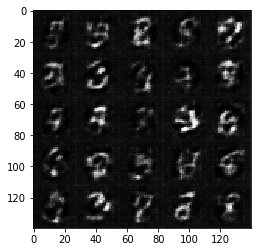

Epoch 1/2... Discriminator Loss: 0.4299... Generator Loss: 1.4092
Epoch 1/2... Discriminator Loss: 1.6873... Generator Loss: 5.3746
Epoch 1/2... Discriminator Loss: 0.5759... Generator Loss: 1.8593
Epoch 1/2... Discriminator Loss: 0.4221... Generator Loss: 1.7080
Epoch 1/2... Discriminator Loss: 0.6376... Generator Loss: 0.9334
Epoch 1/2... Discriminator Loss: 0.4743... Generator Loss: 1.1896
Epoch 1/2... Discriminator Loss: 0.7322... Generator Loss: 3.7712
Epoch 1/2... Discriminator Loss: 0.4454... Generator Loss: 2.0771
Epoch 1/2... Discriminator Loss: 0.8029... Generator Loss: 1.9569
Epoch 1/2... Discriminator Loss: 0.5902... Generator Loss: 1.4068


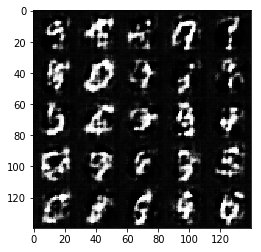

Epoch 1/2... Discriminator Loss: 0.5251... Generator Loss: 1.2220
Epoch 1/2... Discriminator Loss: 0.6343... Generator Loss: 0.9536
Epoch 1/2... Discriminator Loss: 0.6103... Generator Loss: 1.0125
Epoch 1/2... Discriminator Loss: 0.9020... Generator Loss: 0.6256
Epoch 1/2... Discriminator Loss: 0.6835... Generator Loss: 0.8217
Epoch 1/2... Discriminator Loss: 0.3470... Generator Loss: 2.1969
Epoch 1/2... Discriminator Loss: 0.3396... Generator Loss: 1.8795
Epoch 1/2... Discriminator Loss: 0.3413... Generator Loss: 1.7471
Epoch 1/2... Discriminator Loss: 4.0206... Generator Loss: 7.5367
Epoch 1/2... Discriminator Loss: 0.5858... Generator Loss: 1.6684


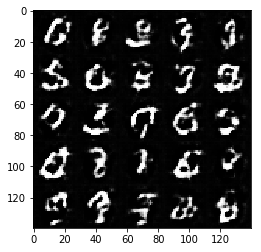

Epoch 1/2... Discriminator Loss: 0.3403... Generator Loss: 1.9534
Epoch 1/2... Discriminator Loss: 0.4722... Generator Loss: 1.5446
Epoch 1/2... Discriminator Loss: 0.4289... Generator Loss: 1.7029
Epoch 1/2... Discriminator Loss: 0.4954... Generator Loss: 1.2515
Epoch 1/2... Discriminator Loss: 0.4269... Generator Loss: 1.4084
Epoch 1/2... Discriminator Loss: 0.4232... Generator Loss: 2.4149
Epoch 1/2... Discriminator Loss: 0.3742... Generator Loss: 1.9751
Epoch 1/2... Discriminator Loss: 0.5188... Generator Loss: 1.1560
Epoch 1/2... Discriminator Loss: 0.4060... Generator Loss: 1.4388
Epoch 1/2... Discriminator Loss: 0.3887... Generator Loss: 1.6342


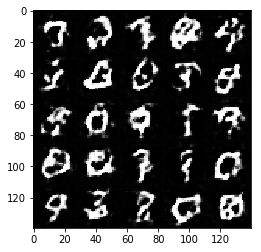

Epoch 1/2... Discriminator Loss: 1.0923... Generator Loss: 0.5402
Epoch 1/2... Discriminator Loss: 0.3166... Generator Loss: 2.2880
Epoch 1/2... Discriminator Loss: 0.3721... Generator Loss: 1.6299
Epoch 1/2... Discriminator Loss: 1.1639... Generator Loss: 0.5239
Epoch 1/2... Discriminator Loss: 0.9028... Generator Loss: 0.9806
Epoch 1/2... Discriminator Loss: 0.8870... Generator Loss: 0.7864
Epoch 1/2... Discriminator Loss: 0.7976... Generator Loss: 0.8963
Epoch 1/2... Discriminator Loss: 0.4676... Generator Loss: 1.5193
Epoch 1/2... Discriminator Loss: 0.9066... Generator Loss: 0.7342
Epoch 1/2... Discriminator Loss: 0.6366... Generator Loss: 0.9987


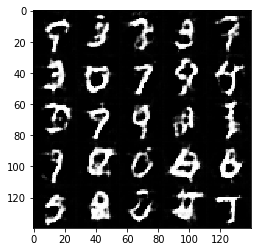

Epoch 1/2... Discriminator Loss: 0.6983... Generator Loss: 0.9118
Epoch 1/2... Discriminator Loss: 0.5902... Generator Loss: 1.1068
Epoch 1/2... Discriminator Loss: 0.3855... Generator Loss: 1.5814
Epoch 1/2... Discriminator Loss: 0.5545... Generator Loss: 1.1609
Epoch 1/2... Discriminator Loss: 0.6830... Generator Loss: 0.8669
Epoch 1/2... Discriminator Loss: 0.5564... Generator Loss: 2.6647
Epoch 1/2... Discriminator Loss: 0.4061... Generator Loss: 1.6368
Epoch 1/2... Discriminator Loss: 0.5800... Generator Loss: 3.0329
Epoch 1/2... Discriminator Loss: 0.4782... Generator Loss: 1.4056
Epoch 1/2... Discriminator Loss: 0.4250... Generator Loss: 1.7525


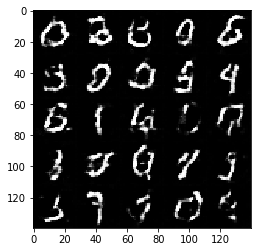

Epoch 1/2... Discriminator Loss: 0.6415... Generator Loss: 0.9844
Epoch 1/2... Discriminator Loss: 0.5484... Generator Loss: 1.2546
Epoch 1/2... Discriminator Loss: 1.0356... Generator Loss: 0.5682
Epoch 1/2... Discriminator Loss: 0.8953... Generator Loss: 0.7026
Epoch 1/2... Discriminator Loss: 0.4506... Generator Loss: 1.3415
Epoch 1/2... Discriminator Loss: 0.3862... Generator Loss: 1.6835
Epoch 1/2... Discriminator Loss: 0.5712... Generator Loss: 1.0989
Epoch 1/2... Discriminator Loss: 0.5989... Generator Loss: 1.0281
Epoch 1/2... Discriminator Loss: 1.0687... Generator Loss: 2.6435
Epoch 1/2... Discriminator Loss: 0.6712... Generator Loss: 1.2600


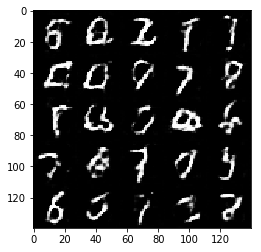

Epoch 1/2... Discriminator Loss: 1.1392... Generator Loss: 3.6648
Epoch 1/2... Discriminator Loss: 0.5695... Generator Loss: 1.1842
Epoch 1/2... Discriminator Loss: 0.4464... Generator Loss: 1.4552
Epoch 1/2... Discriminator Loss: 0.7335... Generator Loss: 0.9043
Epoch 1/2... Discriminator Loss: 0.5474... Generator Loss: 1.6173
Epoch 1/2... Discriminator Loss: 0.5465... Generator Loss: 2.0949
Epoch 1/2... Discriminator Loss: 0.4522... Generator Loss: 1.4799
Epoch 1/2... Discriminator Loss: 0.5214... Generator Loss: 1.2525
Epoch 1/2... Discriminator Loss: 0.5761... Generator Loss: 1.8350
Epoch 1/2... Discriminator Loss: 0.8437... Generator Loss: 0.8641


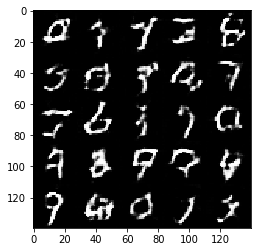

Epoch 1/2... Discriminator Loss: 0.6951... Generator Loss: 0.9402
Epoch 1/2... Discriminator Loss: 0.4388... Generator Loss: 1.6632
Epoch 1/2... Discriminator Loss: 0.3943... Generator Loss: 1.5050
Epoch 2/2... Discriminator Loss: 0.5144... Generator Loss: 1.7252
Epoch 2/2... Discriminator Loss: 0.6234... Generator Loss: 1.1333
Epoch 2/2... Discriminator Loss: 0.5684... Generator Loss: 1.3159
Epoch 2/2... Discriminator Loss: 0.4835... Generator Loss: 1.2684
Epoch 2/2... Discriminator Loss: 0.3795... Generator Loss: 1.4503
Epoch 2/2... Discriminator Loss: 0.5024... Generator Loss: 1.7045
Epoch 2/2... Discriminator Loss: 1.3960... Generator Loss: 2.0980


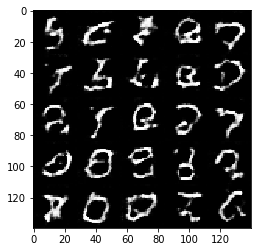

Epoch 2/2... Discriminator Loss: 1.2795... Generator Loss: 2.4250
Epoch 2/2... Discriminator Loss: 0.9363... Generator Loss: 0.7357
Epoch 2/2... Discriminator Loss: 0.7806... Generator Loss: 1.0740
Epoch 2/2... Discriminator Loss: 1.1584... Generator Loss: 2.1930
Epoch 2/2... Discriminator Loss: 1.5386... Generator Loss: 0.3329
Epoch 2/2... Discriminator Loss: 0.9823... Generator Loss: 0.6149
Epoch 2/2... Discriminator Loss: 0.8816... Generator Loss: 1.8760
Epoch 2/2... Discriminator Loss: 0.5886... Generator Loss: 1.7281
Epoch 2/2... Discriminator Loss: 0.7526... Generator Loss: 0.9551
Epoch 2/2... Discriminator Loss: 0.5746... Generator Loss: 1.3359


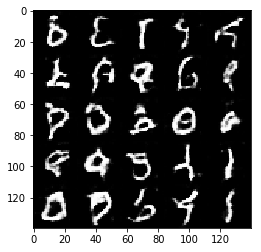

Epoch 2/2... Discriminator Loss: 0.3887... Generator Loss: 1.6984
Epoch 2/2... Discriminator Loss: 0.5469... Generator Loss: 1.2291
Epoch 2/2... Discriminator Loss: 0.6597... Generator Loss: 0.9732
Epoch 2/2... Discriminator Loss: 0.5685... Generator Loss: 1.1338
Epoch 2/2... Discriminator Loss: 1.6341... Generator Loss: 0.2901
Epoch 2/2... Discriminator Loss: 0.6785... Generator Loss: 1.4905
Epoch 2/2... Discriminator Loss: 0.6815... Generator Loss: 1.2664
Epoch 2/2... Discriminator Loss: 0.6362... Generator Loss: 1.4363
Epoch 2/2... Discriminator Loss: 1.0949... Generator Loss: 0.5158
Epoch 2/2... Discriminator Loss: 0.8939... Generator Loss: 0.7631


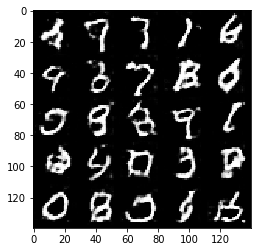

Epoch 2/2... Discriminator Loss: 0.4919... Generator Loss: 1.5504
Epoch 2/2... Discriminator Loss: 1.0537... Generator Loss: 0.5589
Epoch 2/2... Discriminator Loss: 0.7868... Generator Loss: 0.8279
Epoch 2/2... Discriminator Loss: 0.9472... Generator Loss: 0.6709
Epoch 2/2... Discriminator Loss: 0.8658... Generator Loss: 0.7307
Epoch 2/2... Discriminator Loss: 0.4708... Generator Loss: 1.2930
Epoch 2/2... Discriminator Loss: 0.9461... Generator Loss: 1.3892
Epoch 2/2... Discriminator Loss: 0.7406... Generator Loss: 0.9035
Epoch 2/2... Discriminator Loss: 0.8030... Generator Loss: 0.8423
Epoch 2/2... Discriminator Loss: 0.5826... Generator Loss: 1.3379


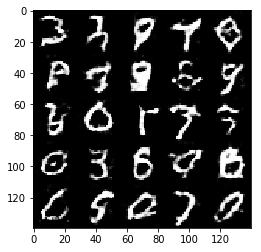

Epoch 2/2... Discriminator Loss: 0.6560... Generator Loss: 0.9911
Epoch 2/2... Discriminator Loss: 0.5429... Generator Loss: 1.2322
Epoch 2/2... Discriminator Loss: 0.5675... Generator Loss: 1.0722
Epoch 2/2... Discriminator Loss: 0.6679... Generator Loss: 0.9526
Epoch 2/2... Discriminator Loss: 0.3688... Generator Loss: 1.7490
Epoch 2/2... Discriminator Loss: 0.5210... Generator Loss: 1.1810
Epoch 2/2... Discriminator Loss: 7.2780... Generator Loss: 0.0017
Epoch 2/2... Discriminator Loss: 0.9659... Generator Loss: 0.6982
Epoch 2/2... Discriminator Loss: 0.7837... Generator Loss: 0.9815
Epoch 2/2... Discriminator Loss: 0.6528... Generator Loss: 0.9930


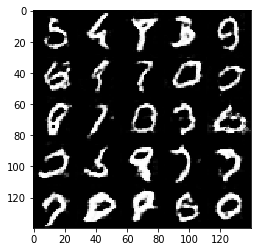

Epoch 2/2... Discriminator Loss: 0.4374... Generator Loss: 1.3064
Epoch 2/2... Discriminator Loss: 0.5614... Generator Loss: 1.2189
Epoch 2/2... Discriminator Loss: 0.7443... Generator Loss: 0.8793
Epoch 2/2... Discriminator Loss: 0.6061... Generator Loss: 1.4405
Epoch 2/2... Discriminator Loss: 0.3533... Generator Loss: 1.7365
Epoch 2/2... Discriminator Loss: 0.7726... Generator Loss: 0.9005
Epoch 2/2... Discriminator Loss: 0.5589... Generator Loss: 2.7442
Epoch 2/2... Discriminator Loss: 0.6446... Generator Loss: 1.8874
Epoch 2/2... Discriminator Loss: 0.8723... Generator Loss: 1.9848
Epoch 2/2... Discriminator Loss: 0.5244... Generator Loss: 2.2375


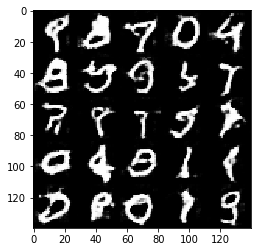

Epoch 2/2... Discriminator Loss: 0.8333... Generator Loss: 0.8010
Epoch 2/2... Discriminator Loss: 0.8153... Generator Loss: 0.8651
Epoch 2/2... Discriminator Loss: 1.1685... Generator Loss: 0.5138
Epoch 2/2... Discriminator Loss: 1.4970... Generator Loss: 3.9534
Epoch 2/2... Discriminator Loss: 0.6983... Generator Loss: 1.1838
Epoch 2/2... Discriminator Loss: 0.9698... Generator Loss: 0.6940
Epoch 2/2... Discriminator Loss: 0.6365... Generator Loss: 1.2534
Epoch 2/2... Discriminator Loss: 0.4586... Generator Loss: 2.2748
Epoch 2/2... Discriminator Loss: 0.6150... Generator Loss: 2.1660
Epoch 2/2... Discriminator Loss: 0.5881... Generator Loss: 1.7639


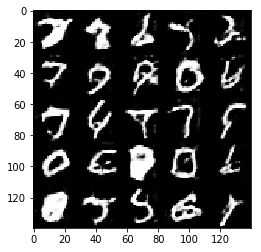

Epoch 2/2... Discriminator Loss: 0.6182... Generator Loss: 1.5506
Epoch 2/2... Discriminator Loss: 0.6911... Generator Loss: 0.9786
Epoch 2/2... Discriminator Loss: 0.5100... Generator Loss: 1.4016
Epoch 2/2... Discriminator Loss: 1.3468... Generator Loss: 4.6060
Epoch 2/2... Discriminator Loss: 0.5539... Generator Loss: 1.2810
Epoch 2/2... Discriminator Loss: 0.4701... Generator Loss: 1.6462
Epoch 2/2... Discriminator Loss: 1.7890... Generator Loss: 0.3055
Epoch 2/2... Discriminator Loss: 0.6289... Generator Loss: 1.0229
Epoch 2/2... Discriminator Loss: 0.4788... Generator Loss: 1.4747
Epoch 2/2... Discriminator Loss: 0.5078... Generator Loss: 1.3110


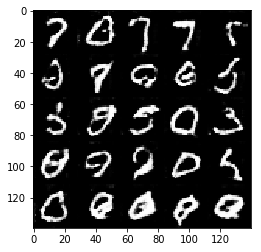

Epoch 2/2... Discriminator Loss: 0.6003... Generator Loss: 1.1089
Epoch 2/2... Discriminator Loss: 0.6523... Generator Loss: 0.9097
Epoch 2/2... Discriminator Loss: 1.1403... Generator Loss: 0.5155
Epoch 2/2... Discriminator Loss: 4.6768... Generator Loss: 8.6054
Epoch 2/2... Discriminator Loss: 0.5186... Generator Loss: 1.2860
Epoch 2/2... Discriminator Loss: 0.4796... Generator Loss: 1.3674
Epoch 2/2... Discriminator Loss: 0.4139... Generator Loss: 1.4632
Epoch 2/2... Discriminator Loss: 0.7230... Generator Loss: 0.9039
Epoch 2/2... Discriminator Loss: 0.5738... Generator Loss: 1.2907
Epoch 2/2... Discriminator Loss: 0.7323... Generator Loss: 0.8812


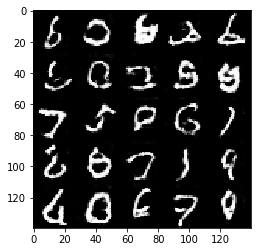

Epoch 2/2... Discriminator Loss: 0.3351... Generator Loss: 1.7964
Epoch 2/2... Discriminator Loss: 1.9374... Generator Loss: 4.0648
Epoch 2/2... Discriminator Loss: 0.6254... Generator Loss: 2.2341
Epoch 2/2... Discriminator Loss: 0.9800... Generator Loss: 2.2436
Epoch 2/2... Discriminator Loss: 0.8944... Generator Loss: 0.9196
Epoch 2/2... Discriminator Loss: 0.6562... Generator Loss: 1.5672
Epoch 2/2... Discriminator Loss: 0.8223... Generator Loss: 0.8116


In [12]:
batch_size = 64
z_dim = 100
learning_rate = 0.0002
beta1 = 0.5


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 2

mnist_dataset = helper.Dataset('mnist', glob(os.path.join(data_dir, 'mnist/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, mnist_dataset.get_batches,
          mnist_dataset.shape, mnist_dataset.image_mode)

### CelebA
Run your GANs on CelebA.  It will take around 20 minutes on the average GPU to run one epoch.  You can run the whole epoch or stop when it starts to generate realistic faces.

Epoch 1/1... Discriminator Loss: 0.6051... Generator Loss: 1.1900
Epoch 1/1... Discriminator Loss: 0.1540... Generator Loss: 2.4860
Epoch 1/1... Discriminator Loss: 2.0616... Generator Loss: 12.9860
Epoch 1/1... Discriminator Loss: 0.2971... Generator Loss: 2.4990
Epoch 1/1... Discriminator Loss: 0.5146... Generator Loss: 2.8115
Epoch 1/1... Discriminator Loss: 0.8623... Generator Loss: 0.9237
Epoch 1/1... Discriminator Loss: 0.6953... Generator Loss: 1.2556
Epoch 1/1... Discriminator Loss: 1.1770... Generator Loss: 3.8282
Epoch 1/1... Discriminator Loss: 1.7648... Generator Loss: 5.4264
Epoch 1/1... Discriminator Loss: 1.2101... Generator Loss: 0.5807


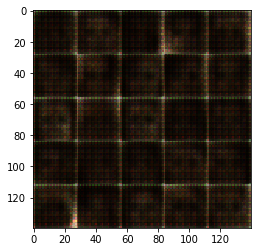

Epoch 1/1... Discriminator Loss: 2.0852... Generator Loss: 5.3318
Epoch 1/1... Discriminator Loss: 1.2390... Generator Loss: 0.5548
Epoch 1/1... Discriminator Loss: 0.7485... Generator Loss: 2.5981
Epoch 1/1... Discriminator Loss: 1.1303... Generator Loss: 1.0031
Epoch 1/1... Discriminator Loss: 0.6734... Generator Loss: 1.2301
Epoch 1/1... Discriminator Loss: 0.7222... Generator Loss: 2.1349
Epoch 1/1... Discriminator Loss: 1.1634... Generator Loss: 0.6564
Epoch 1/1... Discriminator Loss: 0.7038... Generator Loss: 1.9117
Epoch 1/1... Discriminator Loss: 1.0101... Generator Loss: 3.3220
Epoch 1/1... Discriminator Loss: 0.8046... Generator Loss: 1.0356


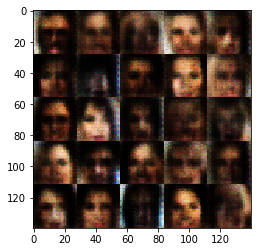

Epoch 1/1... Discriminator Loss: 1.1406... Generator Loss: 1.7654
Epoch 1/1... Discriminator Loss: 1.1442... Generator Loss: 0.8695
Epoch 1/1... Discriminator Loss: 1.1548... Generator Loss: 0.6423
Epoch 1/1... Discriminator Loss: 1.5566... Generator Loss: 0.4353
Epoch 1/1... Discriminator Loss: 0.9109... Generator Loss: 1.4606
Epoch 1/1... Discriminator Loss: 1.2122... Generator Loss: 0.5629
Epoch 1/1... Discriminator Loss: 1.1518... Generator Loss: 0.6667
Epoch 1/1... Discriminator Loss: 1.1941... Generator Loss: 1.1178
Epoch 1/1... Discriminator Loss: 1.3461... Generator Loss: 1.9410
Epoch 1/1... Discriminator Loss: 1.1749... Generator Loss: 1.2131


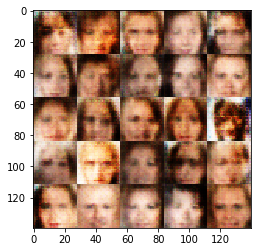

Epoch 1/1... Discriminator Loss: 1.2589... Generator Loss: 0.6911
Epoch 1/1... Discriminator Loss: 1.3738... Generator Loss: 1.8741
Epoch 1/1... Discriminator Loss: 1.1896... Generator Loss: 1.8730
Epoch 1/1... Discriminator Loss: 1.7295... Generator Loss: 1.9080
Epoch 1/1... Discriminator Loss: 1.1186... Generator Loss: 0.7182
Epoch 1/1... Discriminator Loss: 1.2961... Generator Loss: 0.5625
Epoch 1/1... Discriminator Loss: 1.0907... Generator Loss: 0.8702
Epoch 1/1... Discriminator Loss: 1.3014... Generator Loss: 0.4531
Epoch 1/1... Discriminator Loss: 1.1993... Generator Loss: 1.1726
Epoch 1/1... Discriminator Loss: 1.2899... Generator Loss: 0.9201


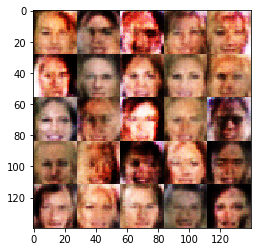

Epoch 1/1... Discriminator Loss: 1.2867... Generator Loss: 0.9131
Epoch 1/1... Discriminator Loss: 1.6882... Generator Loss: 0.3254
Epoch 1/1... Discriminator Loss: 1.3648... Generator Loss: 0.4186
Epoch 1/1... Discriminator Loss: 1.2770... Generator Loss: 1.6526
Epoch 1/1... Discriminator Loss: 1.0242... Generator Loss: 1.9051
Epoch 1/1... Discriminator Loss: 0.8541... Generator Loss: 1.0710
Epoch 1/1... Discriminator Loss: 1.5643... Generator Loss: 0.3418
Epoch 1/1... Discriminator Loss: 1.4910... Generator Loss: 2.8152
Epoch 1/1... Discriminator Loss: 1.6210... Generator Loss: 0.3321
Epoch 1/1... Discriminator Loss: 1.0908... Generator Loss: 0.6135


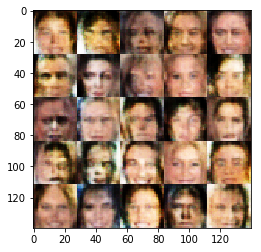

Epoch 1/1... Discriminator Loss: 1.1000... Generator Loss: 0.8817
Epoch 1/1... Discriminator Loss: 1.0823... Generator Loss: 1.1358
Epoch 1/1... Discriminator Loss: 1.3002... Generator Loss: 0.6682
Epoch 1/1... Discriminator Loss: 1.2724... Generator Loss: 1.2633
Epoch 1/1... Discriminator Loss: 1.2688... Generator Loss: 0.5610
Epoch 1/1... Discriminator Loss: 1.2347... Generator Loss: 2.0394
Epoch 1/1... Discriminator Loss: 1.0613... Generator Loss: 1.6625
Epoch 1/1... Discriminator Loss: 1.1311... Generator Loss: 0.8290
Epoch 1/1... Discriminator Loss: 1.1229... Generator Loss: 0.8536
Epoch 1/1... Discriminator Loss: 1.2473... Generator Loss: 0.5422


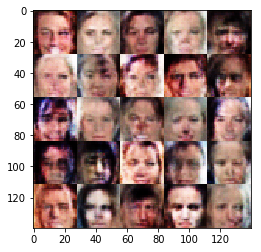

Epoch 1/1... Discriminator Loss: 1.1592... Generator Loss: 1.4248
Epoch 1/1... Discriminator Loss: 1.1608... Generator Loss: 0.6135
Epoch 1/1... Discriminator Loss: 1.0084... Generator Loss: 1.3366
Epoch 1/1... Discriminator Loss: 1.1769... Generator Loss: 2.2420
Epoch 1/1... Discriminator Loss: 1.2109... Generator Loss: 0.6120
Epoch 1/1... Discriminator Loss: 1.0421... Generator Loss: 1.7567
Epoch 1/1... Discriminator Loss: 1.3046... Generator Loss: 0.4475
Epoch 1/1... Discriminator Loss: 1.4183... Generator Loss: 1.9045
Epoch 1/1... Discriminator Loss: 1.3992... Generator Loss: 0.4062
Epoch 1/1... Discriminator Loss: 1.0564... Generator Loss: 1.9603


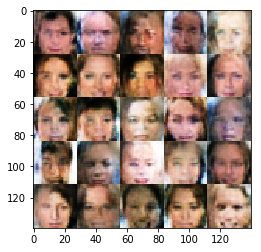

Epoch 1/1... Discriminator Loss: 1.6254... Generator Loss: 0.3133
Epoch 1/1... Discriminator Loss: 1.1186... Generator Loss: 1.0809
Epoch 1/1... Discriminator Loss: 1.4576... Generator Loss: 0.3805
Epoch 1/1... Discriminator Loss: 1.1513... Generator Loss: 0.5712
Epoch 1/1... Discriminator Loss: 1.0865... Generator Loss: 0.5613
Epoch 1/1... Discriminator Loss: 1.0999... Generator Loss: 0.6164
Epoch 1/1... Discriminator Loss: 0.8279... Generator Loss: 1.8311
Epoch 1/1... Discriminator Loss: 1.1781... Generator Loss: 0.5525
Epoch 1/1... Discriminator Loss: 1.5263... Generator Loss: 0.3553
Epoch 1/1... Discriminator Loss: 0.5940... Generator Loss: 2.0950


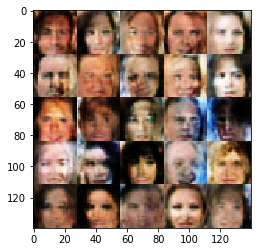

Epoch 1/1... Discriminator Loss: 1.1585... Generator Loss: 0.5444
Epoch 1/1... Discriminator Loss: 0.7388... Generator Loss: 1.1669
Epoch 1/1... Discriminator Loss: 0.8081... Generator Loss: 1.0571
Epoch 1/1... Discriminator Loss: 1.5860... Generator Loss: 0.3486
Epoch 1/1... Discriminator Loss: 1.6106... Generator Loss: 0.3356
Epoch 1/1... Discriminator Loss: 0.6244... Generator Loss: 1.4747
Epoch 1/1... Discriminator Loss: 0.7947... Generator Loss: 1.4330
Epoch 1/1... Discriminator Loss: 1.5569... Generator Loss: 0.3305
Epoch 1/1... Discriminator Loss: 1.2352... Generator Loss: 0.4954
Epoch 1/1... Discriminator Loss: 0.7627... Generator Loss: 1.4746


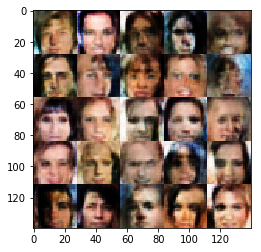

Epoch 1/1... Discriminator Loss: 0.9038... Generator Loss: 1.3506
Epoch 1/1... Discriminator Loss: 1.0303... Generator Loss: 2.7402
Epoch 1/1... Discriminator Loss: 1.1507... Generator Loss: 0.5484
Epoch 1/1... Discriminator Loss: 0.9731... Generator Loss: 1.5245
Epoch 1/1... Discriminator Loss: 1.1717... Generator Loss: 0.5738
Epoch 1/1... Discriminator Loss: 1.2861... Generator Loss: 0.5629
Epoch 1/1... Discriminator Loss: 1.0840... Generator Loss: 0.6822
Epoch 1/1... Discriminator Loss: 1.3163... Generator Loss: 0.4678
Epoch 1/1... Discriminator Loss: 1.0413... Generator Loss: 0.6225
Epoch 1/1... Discriminator Loss: 1.2241... Generator Loss: 0.5241


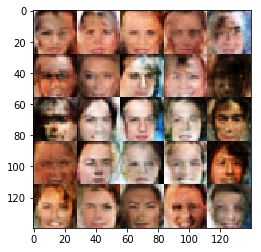

Epoch 1/1... Discriminator Loss: 1.8059... Generator Loss: 0.2591
Epoch 1/1... Discriminator Loss: 1.2068... Generator Loss: 0.6405
Epoch 1/1... Discriminator Loss: 0.7034... Generator Loss: 1.3680
Epoch 1/1... Discriminator Loss: 0.9687... Generator Loss: 1.1530
Epoch 1/1... Discriminator Loss: 1.3020... Generator Loss: 0.4523
Epoch 1/1... Discriminator Loss: 0.9712... Generator Loss: 1.4031
Epoch 1/1... Discriminator Loss: 0.9047... Generator Loss: 1.4133
Epoch 1/1... Discriminator Loss: 0.5968... Generator Loss: 1.3325
Epoch 1/1... Discriminator Loss: 1.2873... Generator Loss: 0.4754
Epoch 1/1... Discriminator Loss: 1.9193... Generator Loss: 0.2382


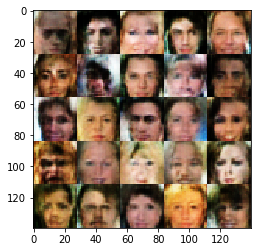

Epoch 1/1... Discriminator Loss: 1.4258... Generator Loss: 0.3868
Epoch 1/1... Discriminator Loss: 0.8078... Generator Loss: 1.3527
Epoch 1/1... Discriminator Loss: 0.5344... Generator Loss: 1.4589
Epoch 1/1... Discriminator Loss: 0.4618... Generator Loss: 2.0390
Epoch 1/1... Discriminator Loss: 1.3526... Generator Loss: 0.5032
Epoch 1/1... Discriminator Loss: 1.8535... Generator Loss: 0.3243
Epoch 1/1... Discriminator Loss: 1.1340... Generator Loss: 0.9001
Epoch 1/1... Discriminator Loss: 0.7076... Generator Loss: 1.1155
Epoch 1/1... Discriminator Loss: 0.6228... Generator Loss: 1.1661
Epoch 1/1... Discriminator Loss: 0.9123... Generator Loss: 2.1179


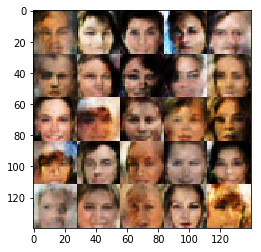

Epoch 1/1... Discriminator Loss: 0.5733... Generator Loss: 1.2915
Epoch 1/1... Discriminator Loss: 0.7231... Generator Loss: 1.8594
Epoch 1/1... Discriminator Loss: 0.7712... Generator Loss: 1.6254
Epoch 1/1... Discriminator Loss: 0.6284... Generator Loss: 1.6376
Epoch 1/1... Discriminator Loss: 1.3462... Generator Loss: 0.3915
Epoch 1/1... Discriminator Loss: 0.8091... Generator Loss: 0.9929
Epoch 1/1... Discriminator Loss: 0.8179... Generator Loss: 1.6813
Epoch 1/1... Discriminator Loss: 1.0812... Generator Loss: 0.6745
Epoch 1/1... Discriminator Loss: 1.1907... Generator Loss: 1.4541
Epoch 1/1... Discriminator Loss: 1.0981... Generator Loss: 0.5354


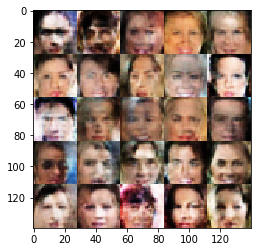

Epoch 1/1... Discriminator Loss: 0.8863... Generator Loss: 2.1027
Epoch 1/1... Discriminator Loss: 0.7223... Generator Loss: 1.1547
Epoch 1/1... Discriminator Loss: 0.4992... Generator Loss: 1.8460
Epoch 1/1... Discriminator Loss: 0.7836... Generator Loss: 0.8264
Epoch 1/1... Discriminator Loss: 2.3795... Generator Loss: 4.0517
Epoch 1/1... Discriminator Loss: 0.8098... Generator Loss: 1.3880
Epoch 1/1... Discriminator Loss: 0.5296... Generator Loss: 1.9334
Epoch 1/1... Discriminator Loss: 0.5136... Generator Loss: 2.4902
Epoch 1/1... Discriminator Loss: 0.6021... Generator Loss: 1.3173
Epoch 1/1... Discriminator Loss: 0.3901... Generator Loss: 1.5482


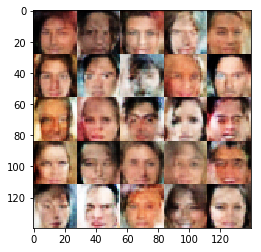

Epoch 1/1... Discriminator Loss: 0.8739... Generator Loss: 0.8286
Epoch 1/1... Discriminator Loss: 1.4450... Generator Loss: 0.3561
Epoch 1/1... Discriminator Loss: 0.9000... Generator Loss: 0.7550
Epoch 1/1... Discriminator Loss: 1.9024... Generator Loss: 0.1985
Epoch 1/1... Discriminator Loss: 1.1776... Generator Loss: 0.8846
Epoch 1/1... Discriminator Loss: 0.4303... Generator Loss: 1.8231
Epoch 1/1... Discriminator Loss: 0.6996... Generator Loss: 1.0645
Epoch 1/1... Discriminator Loss: 0.5284... Generator Loss: 1.2563
Epoch 1/1... Discriminator Loss: 0.5535... Generator Loss: 1.1728
Epoch 1/1... Discriminator Loss: 0.4172... Generator Loss: 3.1010


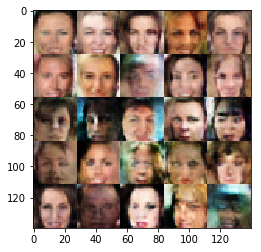

Epoch 1/1... Discriminator Loss: 1.2648... Generator Loss: 1.7932
Epoch 1/1... Discriminator Loss: 1.3704... Generator Loss: 2.3573
Epoch 1/1... Discriminator Loss: 0.4354... Generator Loss: 1.7452
Epoch 1/1... Discriminator Loss: 0.4486... Generator Loss: 1.7304
Epoch 1/1... Discriminator Loss: 0.4020... Generator Loss: 2.3462
Epoch 1/1... Discriminator Loss: 0.4939... Generator Loss: 1.3756
Epoch 1/1... Discriminator Loss: 2.3729... Generator Loss: 0.1527
Epoch 1/1... Discriminator Loss: 1.0509... Generator Loss: 2.5189


In [13]:
batch_size = 128
z_dim = 100
learning_rate = 0.0004
beta1 = 0.5


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 1

celeba_dataset = helper.Dataset('celeba', glob(os.path.join(data_dir, 'img_align_celeba/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, celeba_dataset.get_batches,
          celeba_dataset.shape, celeba_dataset.image_mode)

### Submitting This Project
When submitting this project, make sure to run all the cells before saving the notebook. Save the notebook file as "dlnd_face_generation.ipynb" and save it as a HTML file under "File" -> "Download as". Include the "helper.py" and "problem_unittests.py" files in your submission.